In [ ]:
!pip install ecco
!pip uninstall transformers -y
!pip install transformers==4.16

  Cloning https://github.com/hxyin/ecco to /tmp/pip-req-build-17hij54c
  Running command git clone --filter=blob:none --quiet https://github.com/hxyin/ecco /tmp/pip-req-build-17hij54c
  Resolved https://github.com/hxyin/ecco to commit 5007ffe8a1836799dd00db492ce87ecf210a2306
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00
  Created wheel for ecco: filename=ecco-0.1.2-py2.py3-none-any.whl size=70655 sha256=912fedcea63c43c0c7668753f5166aa5b647e1889d9e433af9c2e1ef139e0142
  Stored in directory: /tmp/pip-ephem-wheel-cache-kmrb3yot/wheels/77/80/bd/710bea43487a3ca3a4d6ad2c7187cd169aae9e336fd06469a6
Successfully built ecco


# Interpretabilità dei modelli generativi

Vediamo ora (utilizzando la libreria [Ecco](https://github.com/jalammar/ecco/)) come e quali tecniche si possono usare per provare a vedere e intrepretare come i modelli Generativi possano arrivare a generare quella specifica parola e/o sequenza di testo di output.

In [ ]:
import ecco

## Metodi di salienza

I metodi di salienza assegnano un peso agli input in maniera proporzionale all'importanza che questi hanno avuto nel determinare il risultato di output. Per farlo, si utilizzano gli embeddings degli input e i gradienti risultanti da uno step di backpropagation all'interno del modello.

Carichiamo in memoria il nostro modello generativo

In [ ]:
lm = ecco.from_pretrained('distilgpt2', activations=True)

Generiamo del testo di output che continua la nostra sequenza di testo iniziale. Come metodo di attribution utilizziamo il metodo Gradient X Input


In [ ]:
text= "The countries of the European Union are:\n1. Austria\n2. Belgium\n3. Bulgaria\n4."

In [ ]:
output = lm.generate(text, generate=20, do_sample=True, attribution=['grad_x_input'])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Andiamo adesso a vedere in maniera interattiva quali token sono stati più considerati per la generazione dei diversi token di output e con quale probabilità

In [ ]:
output.primary_attributions(attr_method='grad_x_input')

<IPython.core.display.Javascript object>

In [ ]:
output.primary_attributions(attr_method='grad_x_input', style="detailed")

<IPython.core.display.Javascript object>

## Hidden States Evolution

Andando a visualizzare l'evoluzione degli hidden state, possiamo vedere in che momento durante il passaggio del nostro input all'interno del modello, il modello ha capito quale fosse il prossimo token più probabile da utilizzare nella sequenza e vedere anche quali sono i token che potrebbero essere generati con alta probabilità

In [ ]:
output = lm.generate(text, generate=10, do_sample=True)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/ecco/output.py:469: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_id = torch.tensor(self.token_ids[0][offset + j])


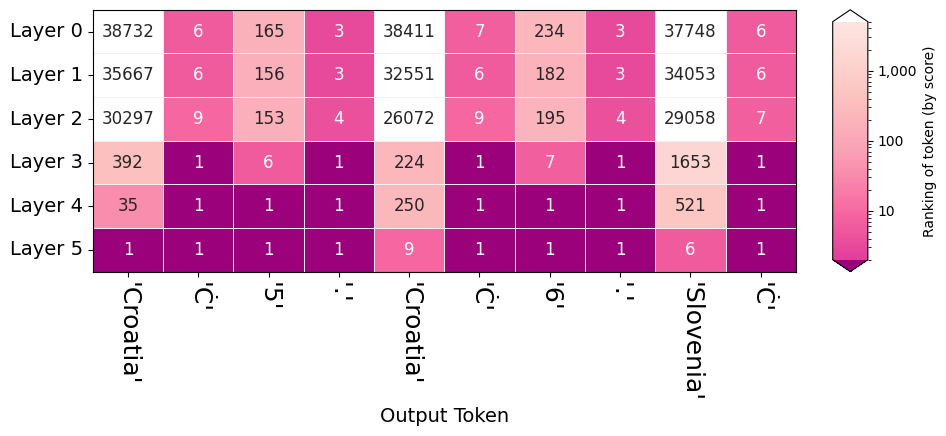

In [ ]:
output.rankings()

In [ ]:
output = lm.generate(text, generate=1, do_sample=False)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

In [ ]:
# We can see more tokens using the topk parameter
output.layer_predictions(position=23, layer=5, topk=20)

<IPython.core.display.Javascript object>

Con tecniche anaolghe è possibile anche mettere a confronto due possibili token di output e vedere con che probabilità e in che layer il modello ha privilegiato un token rispetto a un altro. Questo approccio può essere interessante per identificare possibili bias all'interno del modello:

In [ ]:
text= "The doctor was a"
output = lm.generate(text, generate=1, do_sample=False)


<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

In [ ]:
man_woman_doctor_nurse_token_ids = lm.tokenizer(" man woman doctor nurse")['input_ids']

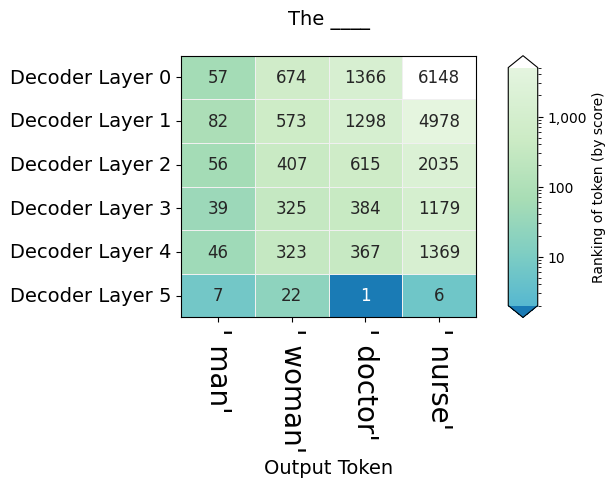

In [ ]:
output.rankings_watch(watch=man_woman_doctor_nurse_token_ids, position=4)

In [ ]:
text= "The nurse was a"
output = lm.generate(text, generate=1, do_sample=False)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

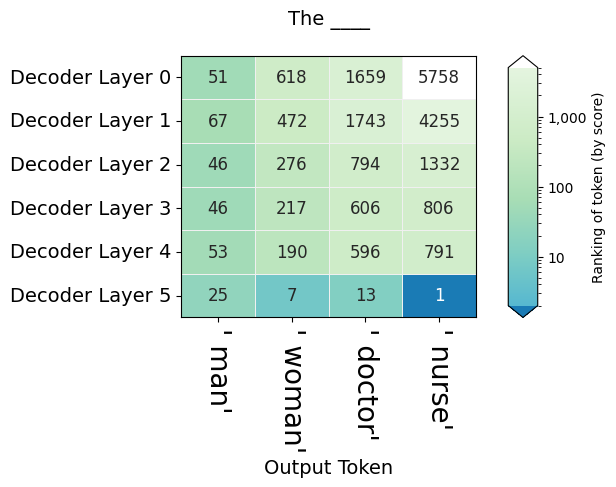

In [ ]:
output.rankings_watch(watch=man_woman_doctor_nurse_token_ids, position=4)

## Metodi di attivazione dei neuroni

Questi metodi studiano e permettono di visualizzare il comportamento e le attivazioni dei neuroni delle reti FeedForward presenti all'interno dei blocchi Encoder/Decoder dei Transformers.
L'interpretazione delle singole attivazioni risulta essere però molto complessa da effettuare: per questo si utilizzano tecniche di clustering e factor analysis per raggruppare attivazioni simili e evidenziare quelle più significative

In [ ]:
text= "The countries of the European Union are:\n1. Austria\n2. Belgium\n3. Bulgaria\n4."

In [ ]:
output = lm.generate(text, generate=1, do_sample=True)

<IPython.core.display.Javascript object>

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


<IPython.core.display.Javascript object>

In [ ]:
nmf_1 = output.run_nmf(n_components=10)

In [ ]:
nmf_1.explore()

<IPython.core.display.Javascript object>